In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import cv2
loc = '/content/drive/My Drive/dataset'

In [4]:
import os
label = []
for i in os.listdir(loc):
  if(i.split('.')[0]== 'cat'):
    label.append(0)
  else:
    label.append(1)

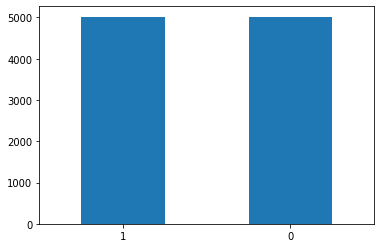

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
label = pd.DataFrame(label)
label[0].value_counts().plot.bar(rot=0)


In [6]:
label.shape

(10028, 1)

In [7]:
from tqdm import tqdm
features = []
for i in tqdm(os.listdir(loc)):
  path = os.path.join(loc,i)
  f = cv2.imread(path)
  fr = cv2.resize(f,(70,70))
  features.append(fr)

100%|██████████| 10028/10028 [01:20<00:00, 124.88it/s]


In [60]:
 import numpy as np
X = np.array(features)
Y = np.array(label)
y = np.array(label)

In [9]:
X.shape

(10028, 70, 70, 3)

In [16]:
Xt = X.reshape(10028,14700)

In [17]:
Xt = Xt/Xt.max()

In [18]:
Xt.shape[1]

14700

In [24]:
import keras
from keras import layers
from keras.utils import to_categorical


In [52]:
model = keras.Sequential()
model.add(layers.Dense(200, activation = 'relu' , input_dim = Xt.shape[1]))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [31]:
Yt = to_categorical(Y)

In [ ]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
pd.DataFrame(Yt).to_csv('cat_dog_labels.csv')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2940200   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 2,960,502
Trainable params: 2,960,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,test_size=0.25,random_state =1)

In [ ]:
xtrain.shape

(7521, 14700)

In [ ]:
ytrain.shape

(7521, 2)

In [ ]:
f= model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
7521/7521 [==============================] - 2s 207us/step - loss: 0.0417 - accuracy: 0.9900
Epoch 2/15
7521/7521 [==============================] - 2s 208us/step - loss: 0.0594 - accuracy: 0.9824
Epoch 3/15
7521/7521 [==============================] - 2s 205us/step - loss: 0.0413 - accuracy: 0.9903
Epoch 4/15
7521/7521 [==============================] - 2s 209us/step - loss: 0.0251 - accuracy: 0.9948
Epoch 5/15
7521/7521 [==============================] - 2s 207us/step - loss: 0.0235 - accuracy: 0.9947
Epoch 6/15
7521/7521 [==============================] - 2s 213us/step - loss: 0.0166 - accuracy: 0.9980
Epoch 7/15
7521/7521 [==============================] - 2s 226us/step - loss: 0.0593 - accuracy: 0.9874
Epoch 8/15
7521/7521 [==============================] - 2s 225us/step - loss: 0.0188 - accuracy: 0.9977
Epoch 9/15
7521/7521 [==============================] - 2s 226us/step - loss: 0.0171 - accuracy: 0.9979
Epoch 10/15
7521/7521 [==============================] - 2s 230u

In [ ]:
model.evaluate(xtest,ytest)

2507/2507 [==============================] - 0s 140us/step


[0.35472556473156064, 0.8775428533554077]

In [ ]:
 model.save('cat_dog_classifier.h5')

In [36]:
p = ['cat','dog']

In [53]:
k = cv2.imread('cat4.jpg')
kt = cv2.resize(k,(70,70))
model.predict(kt.reshape(1,14700))


array([[1., 0.]], dtype=float32)

In [ ]:
p[np.argmax(model.predict(kt.reshape(1,14700)))]

'cat'

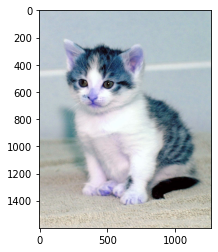

In [ ]:
plt.imshow(k)
plt.show()


In [ ]:
k1 = cv2.imread('dog.jpg')
kt1 = cv2.resize(k1,(70,70))
model.predict(kt1.reshape(1,14700))

array([[0., 1.]], dtype=float32)

In [ ]:
p[np.argmax(model.predict(kt1.reshape(1,14700)))]

'dog'

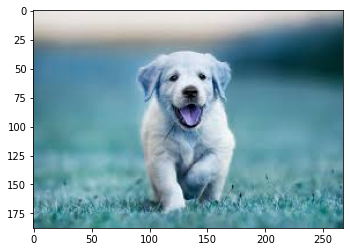

In [ ]:
plt.imshow(k1)
plt.show()

In [21]:
data_features = pd.read_csv("/content/cat_dog.csv",header = None)
data_labels = pd.read_csv("/content/cat_dog_labels.csv")

In [23]:
data_features.shape

(5252, 14701)

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
dtmodel = DecisionTreeClassifier(max_depth= 4)
knnmodel = KNeighborsClassifier(n_neighbors=2)
gnbmodel = GaussianNB()

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Y,test_size=0.25,random_state =1)

In [33]:
xtrain.shape

(7521, 14700)

In [21]:
dtmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
y_hat = dtmodel.predict(xtest)

In [23]:
y_hat

array([0, 1, 1, ..., 1, 1, 0])

In [24]:
print(dtmodel.score(xtrain,ytrain))

print(dtmodel.score(xtest,ytest))

0.6234543278819306
0.581970482648584


In [58]:
xtrain.reshape(7521,14700)
ytrain.reshape(7521,2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,y,test_size=0.25,random_state =1)

In [62]:
gnbmodel = GaussianNB()
gnbmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
print(gnbmodel.score(xtrain,ytrain))
print(gnbmodel.score(xtest,ytest))

0.5786464565882197
0.5899481451934583


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 68, 68, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Yt,test_size=0.25,random_state =1)

In [33]:
model1.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
7521/7521 [==============================] - 16s 2ms/step - loss: 0.9641 - accuracy: 0.6078
Epoch 2/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.6278 - accuracy: 0.6964
Epoch 3/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.5276 - accuracy: 0.7427
Epoch 4/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.4671 - accuracy: 0.7854
Epoch 5/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.4259 - accuracy: 0.8081
Epoch 6/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.4046 - accuracy: 0.8216
Epoch 7/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.3730 - accuracy: 0.8335
Epoch 8/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.3414 - accuracy: 0.8529
Epoch 9/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.3045 - accuracy: 0.8694
Epoch 10/15
7521/7521 [==============================] - 9s 1ms/step - loss: 0.29

In [35]:
model1.evaluate(xtest,ytest)

2507/2507 [==============================] - 1s 500us/step


[0.5393457092199138, 0.809333860874176]

In [48]:
k = cv2.imread('cat2.jpg')
kt = cv2.resize(k,(70,70))
model1.predict(kt.reshape(1,70,70,3))

array([[0.7367967 , 0.26320332]], dtype=float32)

In [49]:
p[np.argmax(model1.predict(kt.reshape(1,70,70,3)))]

'cat'

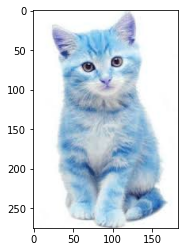

In [50]:
plt.imshow(k)
plt.show()

In [45]:
k1 = cv2.imread('dog3.jpg')
kt1 = cv2.resize(k1,(70,70))
model1.predict(kt1.reshape(1,70,70,3))

array([[0.01975653, 0.98024344]], dtype=float32)

In [46]:
p[np.argmax(model1.predict(kt1.reshape(1,70,70,3)))]

'dog'

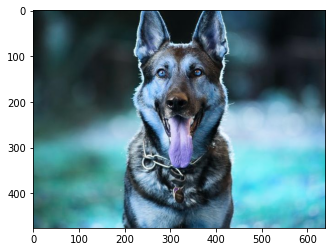

In [51]:
plt.imshow(k1)
plt.show()

In [50]:
data = [["NN" ,1.0000,0.8775428533554077],["DecisionTreeClassifier", 0.6234543278819306,0.581970482648584],
        ["GaussianNB" ,0.5786464565882197,0.5899481451934583],["CNN",0.9186,0.809333860874176]]

In [52]:
Accuracy = pd.DataFrame(data,columns=['Model','Training_Accuracy','Test_Accuracy'])

Text(0, 0.5, 'Training Accuracy')

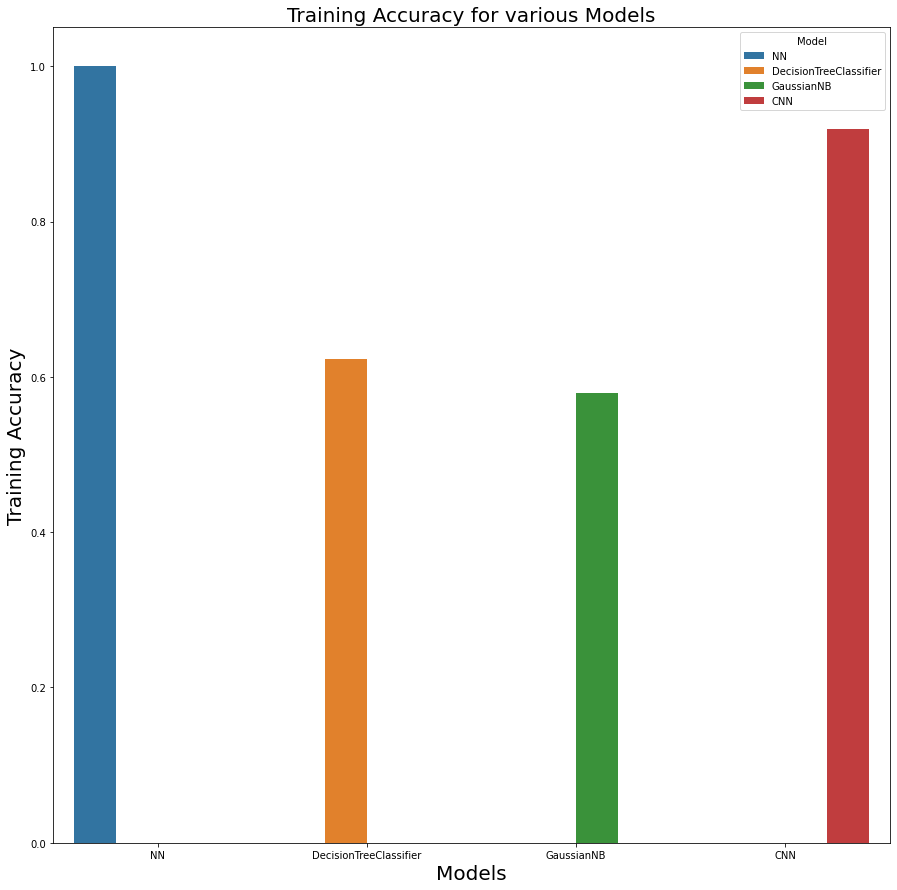

In [53]:
import seaborn as sns
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='Model',y='Training_Accuracy',data = Accuracy,hue='Model',)
plt.title("Training Accuracy for various Models",fontsize =20)
plt.xlabel('Models',fontsize =20)
plt.ylabel('Training Accuracy',fontsize = 20)

Text(0, 0.5, 'Test Accuracy')

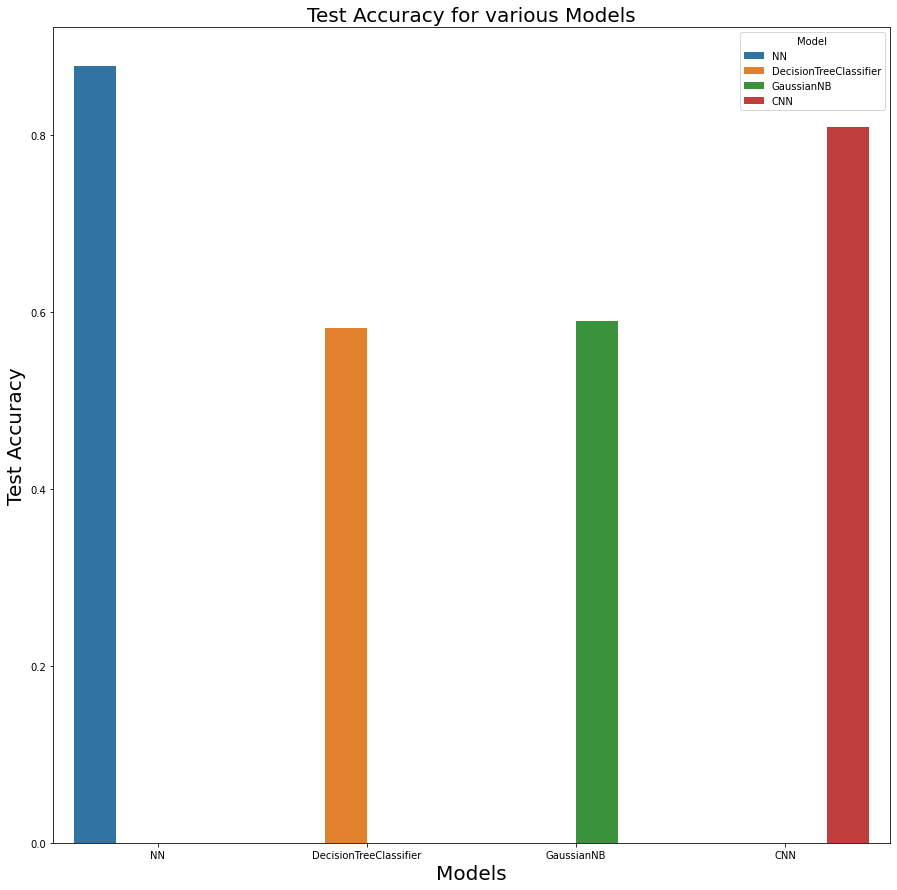

In [54]:
import seaborn as sns
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='Model',y='Test_Accuracy',data =Accuracy,hue='Model',)
plt.title("Test Accuracy for various Models",fontsize =20)
plt.xlabel('Models',fontsize =20)
plt.ylabel('Test Accuracy',fontsize = 20)

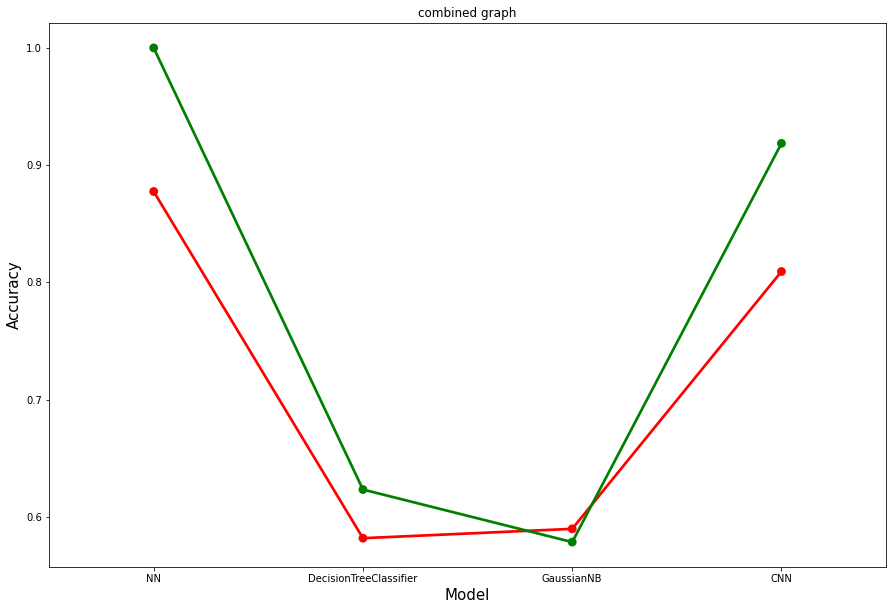

In [55]:
plt.figure(figsize=(15,10))
plt.title('combined graph')
plt.xticks(rotation=0)
sns.pointplot(Accuracy['Model'],Accuracy['Test_Accuracy'],color='red')
sns.pointplot(Accuracy['Model'],Accuracy['Training_Accuracy'],color='green')
plt.xlabel('Model',fontsize =15)
plt.ylabel('Accuracy',fontsize =15)
plt.show()

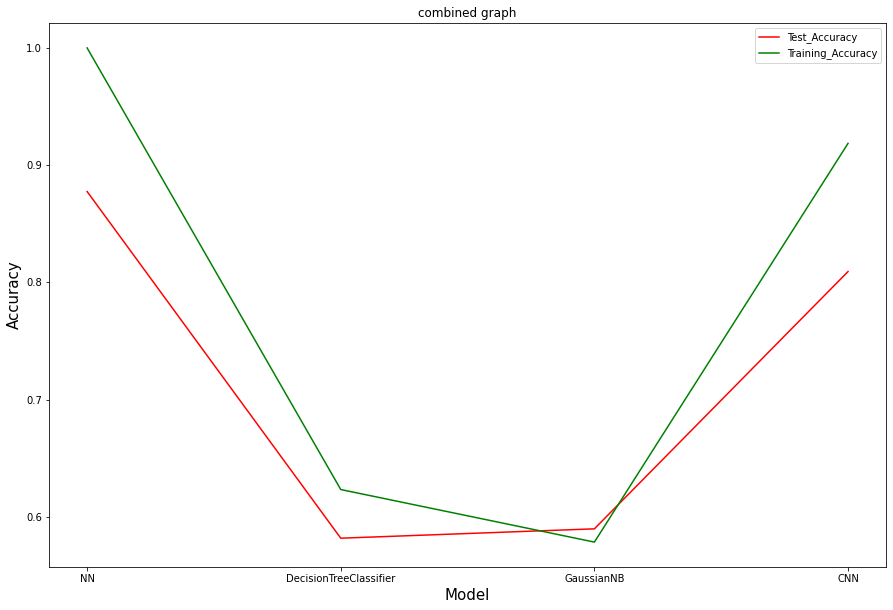

In [60]:
plt.figure(figsize=(15,10))
plt.title('combined graph')
plt.xticks(rotation=0)
plt.plot('Model','Test_Accuracy',color='red',data = Accuracy)
plt.plot('Model','Training_Accuracy',color='green',data = Accuracy)
plt.legend()
plt.xlabel('Model',fontsize =15)
plt.ylabel('Accuracy',fontsize =15)
plt.show()